In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\vyshn\Downloads\ctr\ctr\ad_10000records.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


Click Through Rate Analysis


analyze the click-through rate based on the time spent by the users on the website

<Axes: xlabel='Clicked on Ad', ylabel='Daily Time Spent on Site'>

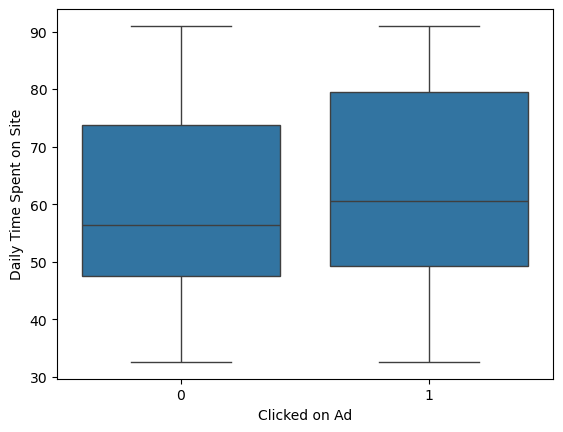

In [4]:
sns.boxplot(df, y='Daily Time Spent on Site', x=df['Clicked on Ad'])

analyze the click-through rate based on the daily internet usage of the user:



<Axes: xlabel='Clicked on Ad', ylabel='Daily Time Spent on Site'>

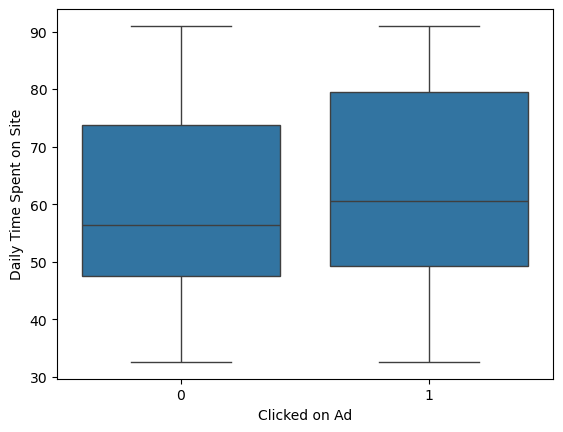

In [5]:
sns.boxplot(df, y='Daily Time Spent on Site', x='Clicked on Ad')

 click-through rate based on the age of the users:

<Axes: xlabel='Clicked on Ad', ylabel='Age'>

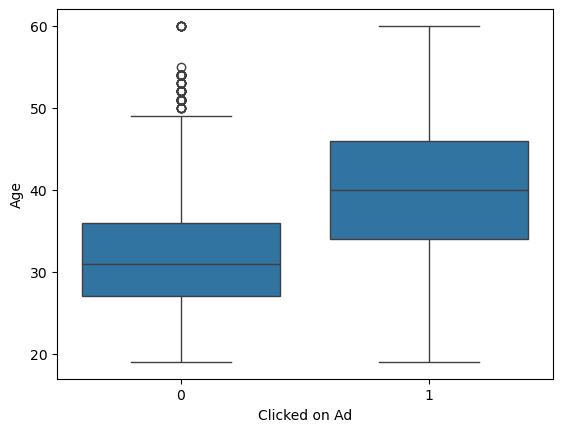

In [6]:
sns.boxplot(df, x='Clicked on Ad', y='Age')

analyze the click-through rate based on the income of the users:



<Axes: xlabel='Clicked on Ad', ylabel='Area Income'>

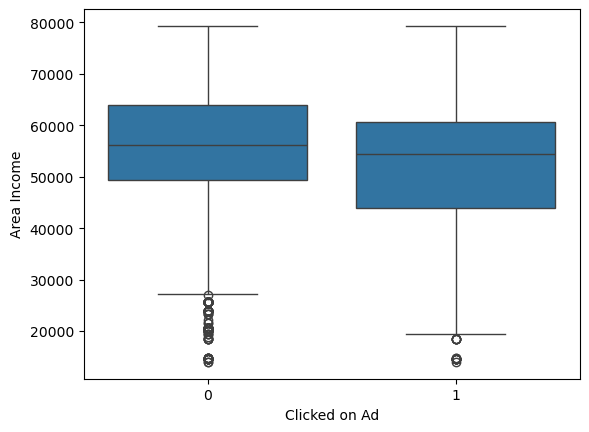

In [7]:
sns.boxplot(df, x='Clicked on Ad', y='Area Income')

Calculating CTR of Ads


In [8]:
len(df['City'].unique())

521

In [9]:
len(df)

10000

In [10]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    5083
1    4917
Name: count, dtype: int64

So 4917 out of 10000 users clicked on the ads. Let’s calculate the CTR:



In [11]:
click_through_rate = 4917/len(df) *100

In [12]:
click_through_rate

49.17

So the CTR is 49.17.



Splitting X and y

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')

In [15]:
df['Gender'] = df['Gender'].map({'Male':1,
                                'Female': 0})

In [16]:
X =df[['Daily Time Spent on Site','Age', 'Area Income', 'Daily Internet Usage', 'Gender']]

In [17]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender
0,62.26,32.0,69481.85,172.83,1
1,41.73,31.0,61840.26,207.17,1
2,44.40,30.0,57877.15,172.83,0
3,59.88,28.0,56180.93,207.17,0
4,49.21,30.0,54324.73,201.58,0
...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,1
9996,41.73,28.0,51501.38,120.49,1
9997,55.60,39.0,38067.08,124.44,0
9998,46.61,50.0,43974.49,123.13,0


In [18]:
y = df['Clicked on Ad']

In [19]:
y

0       0
1       0
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Name: Clicked on Ad, Length: 10000, dtype: int64

train the model using the random forecast classification algorithm:



In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaled_x_train = scaler.fit_transform(X_train)

In [25]:
scaled_x_test = scaler.transform(X_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model = RandomForestClassifier()

In [28]:
model.fit(scaled_x_train, y_train)

RandomForestClassifier()

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
y_pred = model.predict(scaled_x_test)

In [31]:
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [32]:
accuracy_score(y_test, y_pred)

0.783

In [33]:
print("Ads Click Through Rate Prediction : ")
a = float(input("Daily Time Spent on Site: "))
b = float(input("Age: "))
c = float(input("Area Income: "))
d = float(input("Daily Internet Usage: "))
e = input("Gender (Male = 1, Female = 0) : ")

features = np.array([[a, b, c, d, e]])
print("Will the user click on ad = ", model.predict(features))

Ads Click Through Rate Prediction : 
Daily Time Spent on Site: 11
Age: 33
Area Income: 543332
Daily Internet Usage: 2
Gender (Male = 1, Female = 0) : 0
Will the user click on ad =  [1]
